# Importing necessary libraries


In [1]:
# Operating System
import os

# OpenCV for capturing videos
import cv2

# Mathematical operations
import math

# Geocoding
import geocoder

# HTTP requests
import requests

# Data manipulation with pandas
import pandas as pd

# Twilio for SMS
from twilio.rest import Client

# Geocoding with Nominatim
from geopy.geocoders import Nominatim

# Image preprocessing with Keras
from keras.preprocessing import image

# Mathematical operations with NumPy
import numpy as np

# One-hot encoding with Keras
from tensorflow.keras.utils import to_categorical

# Plotting with Matplotlib
from matplotlib import pyplot as plt

# Image resizing with scikit-image
from skimage.transform import resize

# Additional setup for inline plotting
%matplotlib inline


C:\Users\SHRIYA\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


#  Capturing Frames from Accident Footage for Analysis

In [2]:
count = 0 

cap = cv2.VideoCapture("Accidents.mp4")  # Capturing the video from the given path
frameRate = cap.get(5)  # Frame rate

while(cap.isOpened()):
    frameId = cap.get(1) # Current frame number frame
    ret, frame = cap.read()

    if not ret:
        break

    if frameId % math.floor(frameRate) == 0:
        filename = f"{count}.jpg"
        count += 1
        cv2.imwrite(filename, frame)

cap.release()

print("successful ")


successful 


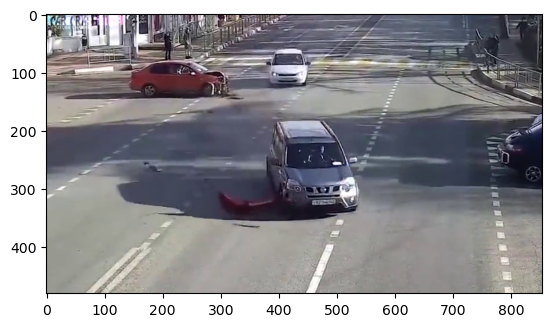

In [3]:
img = plt.imread('11.jpg')   # reading image using its name
plt.imshow(img)

In [4]:
img

array([[[124, 112, 136],
        [125, 122, 141],
        [ 87,  99, 115],
        ...,
        [122, 121, 127],
        [104, 103, 108],
        [ 99,  97, 102]],

       [[122, 114, 137],
        [ 78,  79,  97],
        [ 52,  66,  79],
        ...,
        [ 80,  79,  84],
        [ 59,  58,  63],
        [ 43,  42,  47]],

       [[149, 146, 167],
        [ 25,  31,  47],
        [ 34,  52,  64],
        ...,
        [ 34,  33,  38],
        [ 41,  40,  45],
        [ 46,  46,  48]],

       ...,

       [[154, 155, 147],
        [154, 155, 147],
        [154, 155, 147],
        ...,
        [153, 146, 136],
        [155, 148, 138],
        [158, 151, 141]],

       [[154, 155, 147],
        [153, 154, 146],
        [153, 154, 146],
        ...,
        [150, 143, 133],
        [156, 149, 139],
        [158, 151, 141]],

       [[153, 154, 146],
        [153, 154, 146],
        [153, 154, 146],
        ...,
        [152, 145, 135],
        [165, 158, 148],
        [165, 158, 148]]

In [5]:
data = pd.read_csv('training_data.csv')     # reading the csv file
data.head(11)

,Image_ID,value
0,0.jpg,0
1,1.jpg,0
2,2.jpg,0
3,3.jpg,0
4,4.jpg,0
5,5.jpg,0
6,6.jpg,0
7,7.jpg,0
8,8.jpg,0
9,9.jpg,0


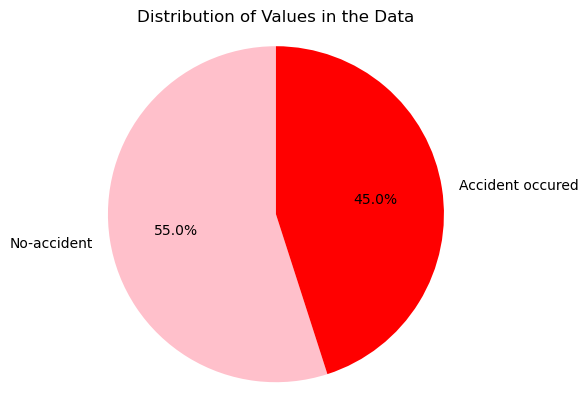

In [6]:
# Count the occurrences of each value in the 'value' column
value_counts = data['value'].value_counts()

# Data for the pie chart
labels = ['No-accident','Accident occured']
sizes = value_counts.values
colors = ['pink', 'red']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Distribution of Values in the Data')
plt.show()

In [7]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [8]:

# Assuming 'data' is your DataFrame
y = data['value']
dummy_y = to_categorical(y)



In [9]:
print(dummy_y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [10]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

In [11]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X,data_format=None)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)

In [13]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [14]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) 

In [ ]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

In [ ]:
X_train = X_train.reshape(155, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(67, 7*7*512)

In [ ]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [ ]:
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(2, activation='softmax'))    # output layer

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
count = 0
videoFile = "Accident-1.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [ ]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [ ]:
# preprocessing the images
test_image = preprocess_input(test_image, data_format=None)

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)
test_image.shape

In [ ]:
test_image = test_image.reshape(9, 7*7*512)

# zero centered images
test_image = test_image/test_image.max()

In [ ]:
predictions = model.predict(test_image)

In [ ]:
print(predictions)

In [ ]:
for i in range (0,10):
    if predictions[i][0]<predictions[i][1]:
        print("No Accident")
    else:
        print("Accident")
    

In [ ]:
from sklearn.metrics import accuracy_score
# Predict on the validation set
valid_predictions = model.predict(X_valid)

# Calculate accuracy score
accuracy = accuracy_score(np.argmax(valid_predictions, axis=1), np.argmax(y_valid, axis=1))
print("Accuracy Score:", accuracy)
